In [1]:
# Import packages
import os
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss, accuracy_score, r2_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

%matplotlib inline

In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'cleaned_data.csv')
df = pd.read_csv(data_path)
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Month,Day_in_week,Points (Total)
0,0.668,0.758,0.033,0.483,0.000,0.834,-5176.0,5,0,200
1,0.652,0.800,0.061,0.143,0.629,0.234,-4019.0,5,0,199
2,0.812,0.479,0.333,0.213,0.000,0.559,-5678.0,5,0,198
3,0.783,0.592,0.033,0.435,0.000,0.726,-8332.0,5,0,197
4,0.569,0.724,0.047,0.228,0.000,0.562,-4076.0,5,0,196


In [3]:
df_features = df.drop(columns=["Month"]).copy()

In [5]:
df_features.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Day_in_week,Points (Total)
0,0.668,0.758,0.033,0.483,0.000,0.834,-5176.0,0,200
1,0.652,0.800,0.061,0.143,0.629,0.234,-4019.0,0,199
2,0.812,0.479,0.333,0.213,0.000,0.559,-5678.0,0,198
3,0.783,0.592,0.033,0.435,0.000,0.726,-8332.0,0,197
4,0.569,0.724,0.047,0.228,0.000,0.562,-4076.0,0,196


In [6]:
# Using OneHotEncoder to Categorize "Day_in_week"
enc = OneHotEncoder()
enc.fit(df_features[['Day_in_week']])
# enc.categories_
onehot = enc.transform(df_features[['Day_in_week']]).toarray()
onehot = pd.DataFrame(onehot, columns=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
onehot.shape

df_features_cate = pd.concat([df_features, onehot], axis=1)
df_features_cate.drop(columns="Day_in_week", inplace=True)
df_features_cate.head()

,Danceability,Energy,Speechiness,Acousticness,Instrumentalness,Valence,Loudness,Points (Total),Mon,Tue,Wed,Thu,Fri,Sat,Sun
0,0.668,0.758,0.033,0.483,0.000,0.834,-5176.0,200,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.652,0.800,0.061,0.143,0.629,0.234,-4019.0,199,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.812,0.479,0.333,0.213,0.000,0.559,-5678.0,198,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.783,0.592,0.033,0.435,0.000,0.726,-8332.0,197,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.569,0.724,0.047,0.228,0.000,0.562,-4076.0,196,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# feature_cols = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
#        'Instrumentalness', 'Valence', 'Loudness', 'Day_in_week']

X = df_features.drop(columns="Points (Total)").copy()
y = pd.cut(df_features["Points (Total)"], bins=8, labels=range(1, 9))

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<Axes: xlabel='Points (Total)', ylabel='Count'>

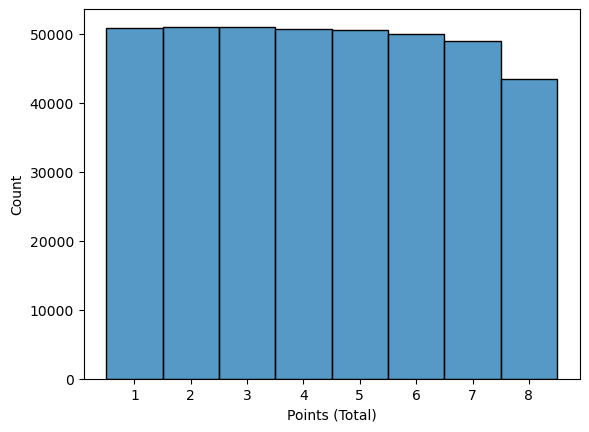

In [38]:
sns.histplot(y)

# Decision Tree

In [39]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[[3417 1727 1219  836  678  664  782  849]
 [2301 1944 1468 1067  809  744  890  976]
 [1573 1547 1885 1499  940  808  972 1055]
 [1113 1045 1422 1836 1374  961 1040 1235]
 [ 823  819 1003 1364 1991 1517 1260 1386]
 [ 708  607  644  792 1484 2208 1985 1518]
 [ 565  496  569  588  690 1379 3249 2253]
 [ 368  395  359  399  458  529 1492 4777]]
-0.2476669122130497
0.2685158347090774


<Axes: >

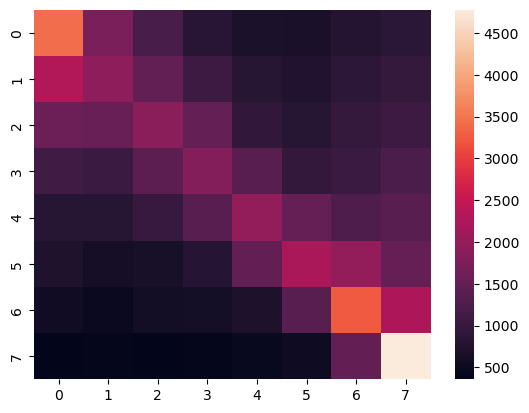

In [40]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
# fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_cm)

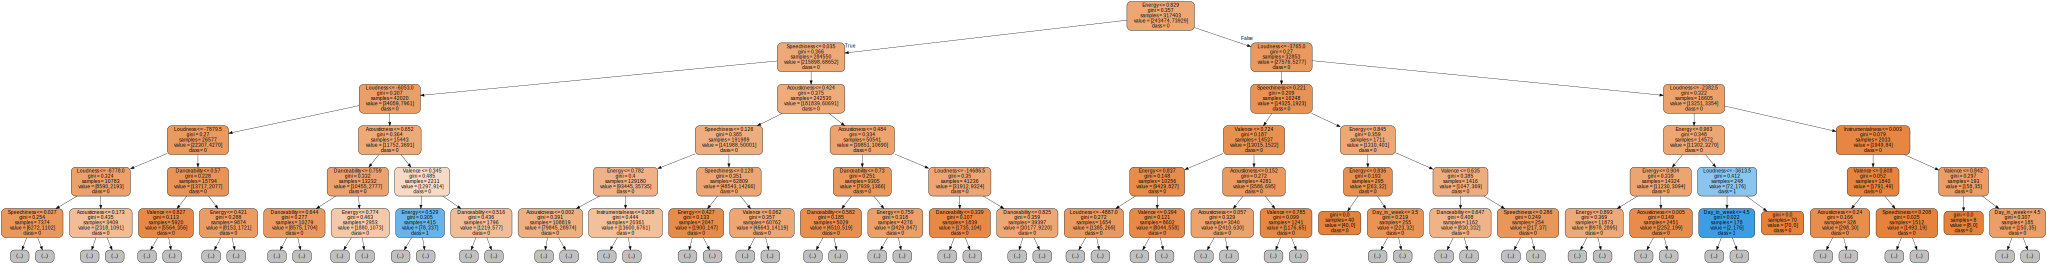

In [28]:
dot_data = export_graphviz(clf, out_file=None, 
    feature_names=X_train.columns,  
    class_names=[str(i) for i in y_train.unique()],  
    filled=True, rounded=True,  
    special_characters=False,
    max_depth=5)
graph = graphviz.Source(dot_data)
graph

[[40676     0]
 [38675     0]]


<Axes: >

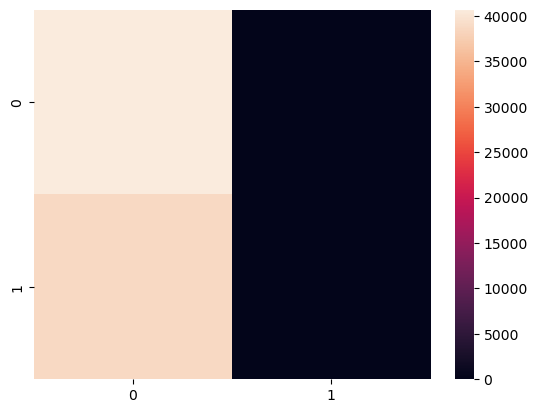

In [62]:
dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
y_dummy = dummy.predict(X_test)
accuracy_score(y_test, y_dummy)

cm = confusion_matrix(y_test, y_dummy)
print(confusion_matrix(y_test, y_dummy))

df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
# fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_cm)

# Random Forest

In [99]:
clf = RandomForestClassifier(n_estimatorsint=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[[12866  5793  4696  5466]
 [ 5895 10384  6645  6591]
 [ 2616  5024 13268  9219]
 [ 1536  2104  4542 20779]]
-0.1328082294679176
0.48794965254121814


<Axes: >

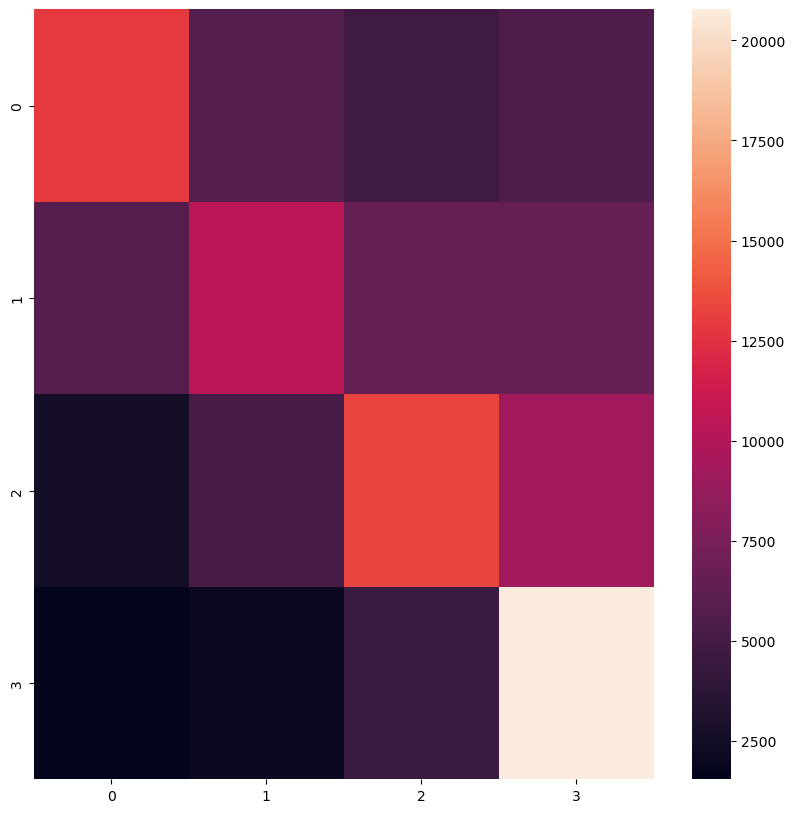

In [100]:
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(r2_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[1]))
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df_cm)